# Способы представления данных

✍ Прежде чем перейти к способам обработки данных, давайте вспомним, какие типы данных встречаются в задачах анализа.

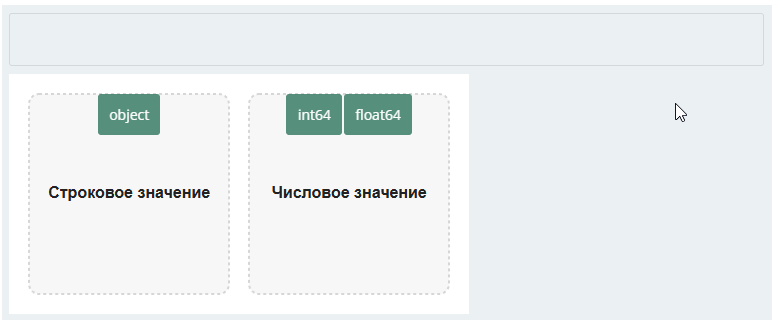

**При этом выделяют:**

- текстовые признаки (object);
- числовые признаки (int64 и float64);
- признаки, обозначающие дату и время/широту и долготу (представляются в числовом формате);
- категориальные признаки, которые могут иметь любой из трёх типов данных и обозначают принадлежность объекта к какому-то классу/категории (см. Python 11.5. «Тип данных Category»);
- бинарные признаки, которые являются подвидом категориальных признаков и обозначают принадлежность к одному из двух классов/категорий.

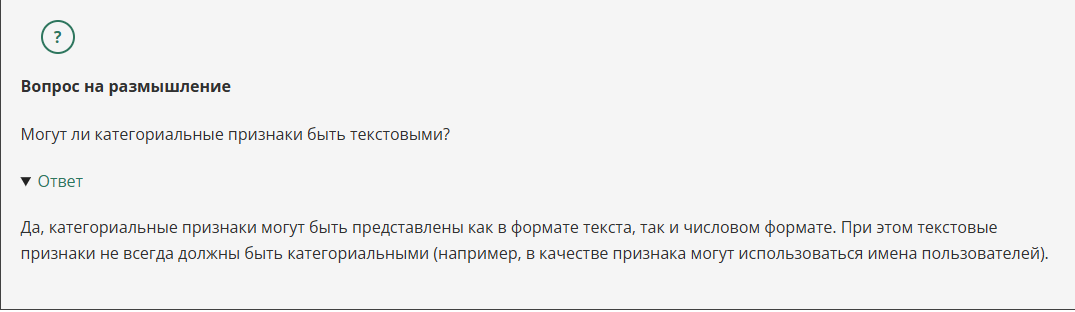

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('data/data_ford_price.xlsx')

In [7]:
df

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


Итак, у нас есть:

- четыре признака типа *object* (обычно это строковые значения);
- пять признаков типа *int64* (целочисленные значения);
- три признака типа *float64* (числа с плавающей точкой).

Для более подробного анализа числовых признаков используют методы describe() и hist(). Для оценки распределения текстовых признаков можно воспользоваться методом value_counts().

title_status
clean      0.948696
rebuilt    0.021519
lien       0.020522
salvage    0.008408
missing    0.000855
Name: proportion, dtype: float64
------------
count    7017.000000
mean       39.550144
std         5.745409
min        -2.508807
25%        35.661076
50%        40.335245
75%        43.582100
max        77.617682
Name: lat, dtype: float64


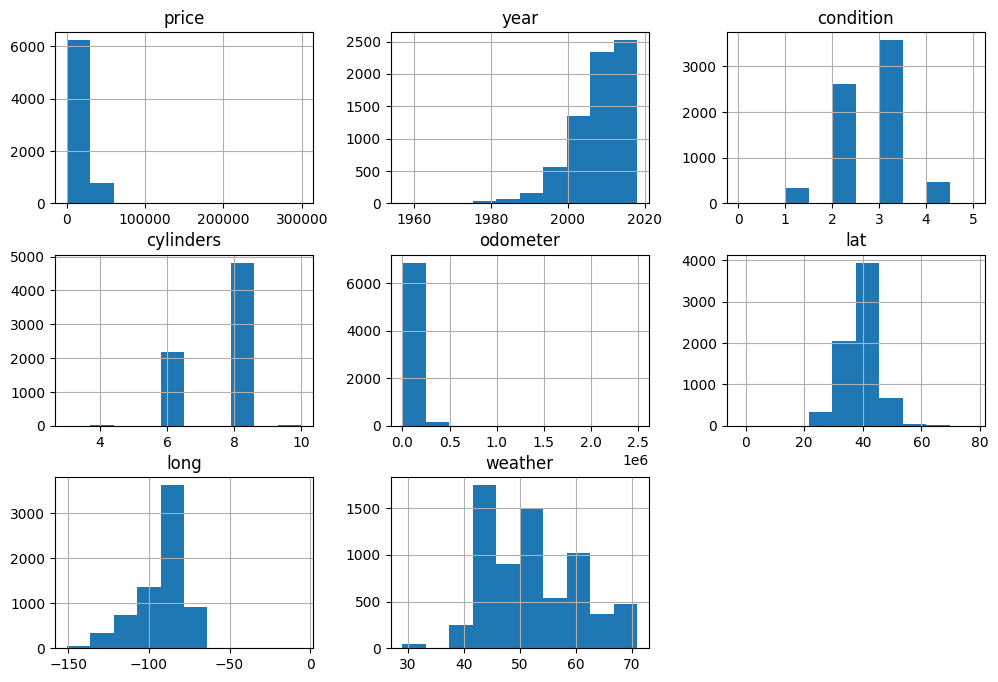

In [18]:
df.hist(figsize = (12, 8))
print(df['title_status'].value_counts(True))
print('------------')
print(df['lat'].describe())

Как вы поняли, разные представления данных требуют разного формата препроцессинга. Машины способны обрабатывать только цифровую информацию, в связи с чем все текстовые признаки должны быть переведены в числовой формат. Более того, к текстовым признакам могут быть применены **регулярные выражения** для агрегации важной информации и создания новых признаков (см. EDA-3.2. «Создание признаков»).

Текстовые признаки, как и числовые, нуждаются в заполнении пропусков для последующей корректной работы алгоритмов машинного обучения. Однако способы такой обработки различны для двух данных типов. Числовые категориальные признак также нуждаются в предобработке.